In [17]:
import pandas as pd
import  numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
veri=pd.read_csv("istanbul-ev-fiyatlari.csv")

In [19]:
veri.columns

Index(['Unnamed: 0', 'district', 'price', 'AdUpdateDate', 'GrossSquareMeters',
       'BuildingAge', 'NumberFloorsofBuilding', 'NumberOfRooms',
       'FloorLocation', 'CreditEligibility', 'NetSquareMeters', 'kategori'],
      dtype='object')

In [20]:
veri=veri.drop(columns=['Unnamed: 0','AdUpdateDate'])
veri.columns

Index(['district', 'price', 'GrossSquareMeters', 'BuildingAge',
       'NumberFloorsofBuilding', 'NumberOfRooms', 'FloorLocation',
       'CreditEligibility', 'NetSquareMeters', 'kategori'],
      dtype='object')

In [21]:
veri=veri.rename(columns={
    'district':"ilce",
    'price':"fiyat2", 
    'GrossSquareMeters':"brutm2",
    'BuildingAge':"yas",
       'NumberFloorsofBuilding':"kat_sayisi", 
       'NumberOfRooms':"oda_sayisi",
       'FloorLocation':"kat",
       'CreditEligibility':"kredi",
       'NetSquareMeters':"netm2", 
       'kategori':"tip"
                          })

In [22]:
veri.head()

,ilce,fiyat2,brutm2,yas,kat_sayisi,oda_sayisi,kat,kredi,netm2,tip
0,adalar,3100000,160.0,21,3,3+1,Çatı Katı,Krediye Uygun,120.0,Daire
1,adalar,1600000,120.0,5,3,2+1,Bahçe Katı,Krediye Uygun,100.0,Daire
2,adalar,18500000,350.0,21,2,3+1,Düz Giriş,Krediye Uygun,300.0,Müstakil Ev
3,adalar,9500000,550.0,11,3,8+ Oda,Düz Giriş,Krediye Uygun Değil,540.0,Bina
4,adalar,25000000,840.0,21,4,8+ Oda,Düz Giriş,Krediye Uygun,700.0,Köşk


In [23]:
veri["fiyat"]=veri["fiyat2"]
veri.drop(columns=["fiyat2"],inplace=True)
veri["fiyat"]=veri["fiyat"].astype("float64")
veri.head()

,ilce,brutm2,yas,kat_sayisi,oda_sayisi,kat,kredi,netm2,tip,fiyat
0,adalar,160.0,21,3,3+1,Çatı Katı,Krediye Uygun,120.0,Daire,3100000.0
1,adalar,120.0,5,3,2+1,Bahçe Katı,Krediye Uygun,100.0,Daire,1600000.0
2,adalar,350.0,21,2,3+1,Düz Giriş,Krediye Uygun,300.0,Müstakil Ev,18500000.0
3,adalar,550.0,11,3,8+ Oda,Düz Giriş,Krediye Uygun Değil,540.0,Bina,9500000.0
4,adalar,840.0,21,4,8+ Oda,Düz Giriş,Krediye Uygun,700.0,Köşk,25000000.0


adalar


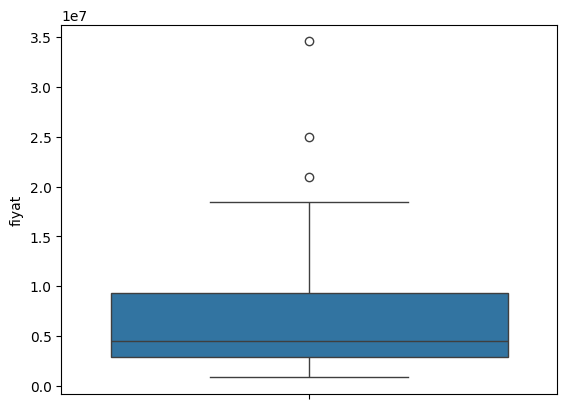

arnavutkoy


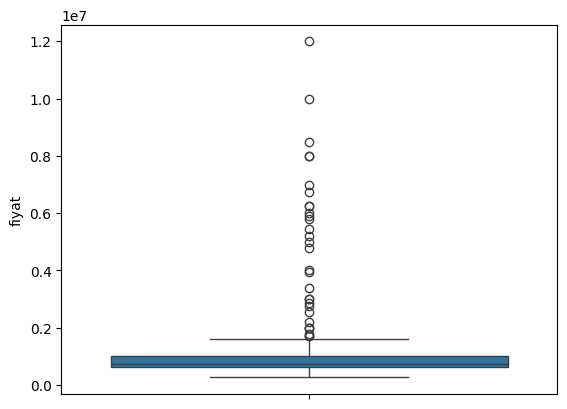

atasehir


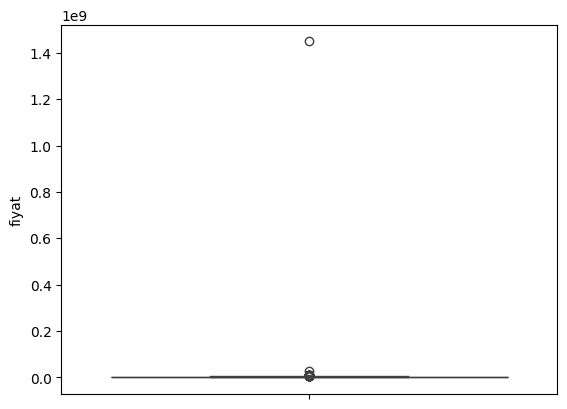

avcilar


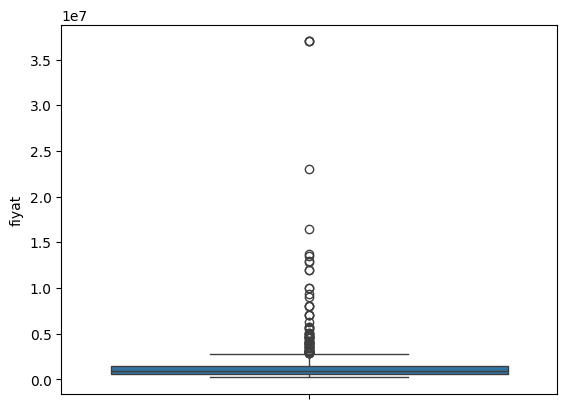

bagcilar


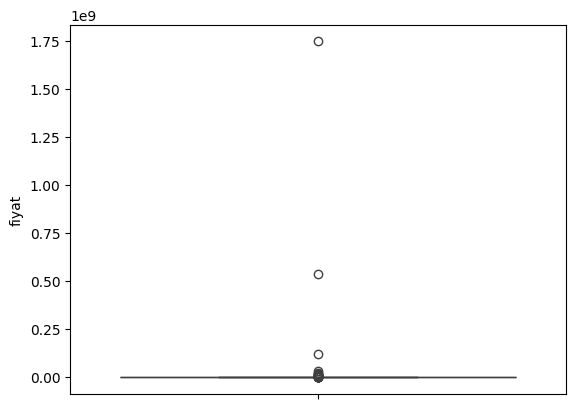

bahcelievler


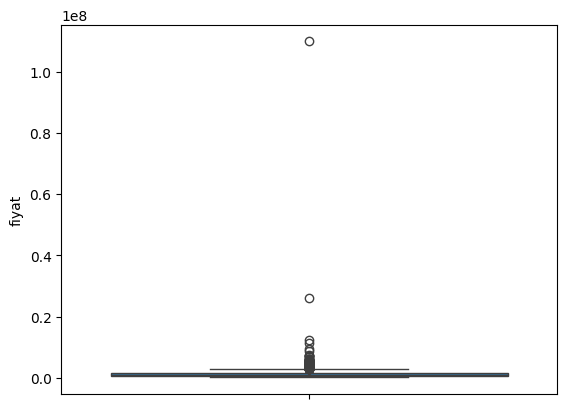

bakirkoy


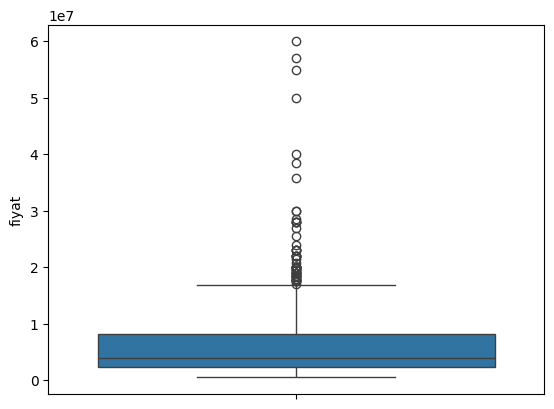

basaksehir


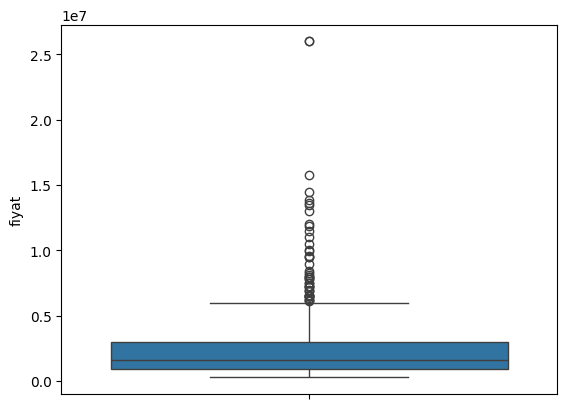

bayrampasa


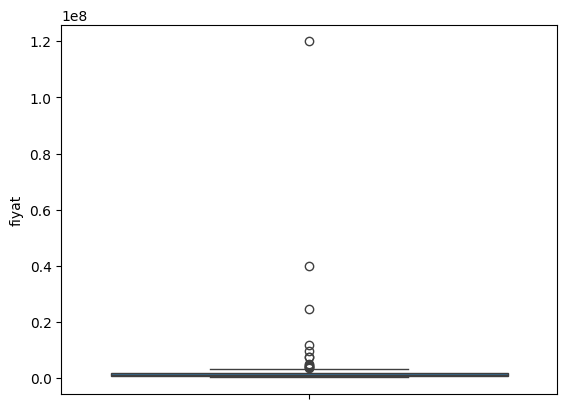

besiktas


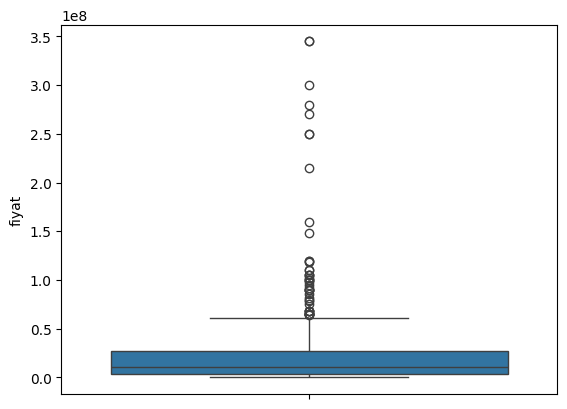

beykoz


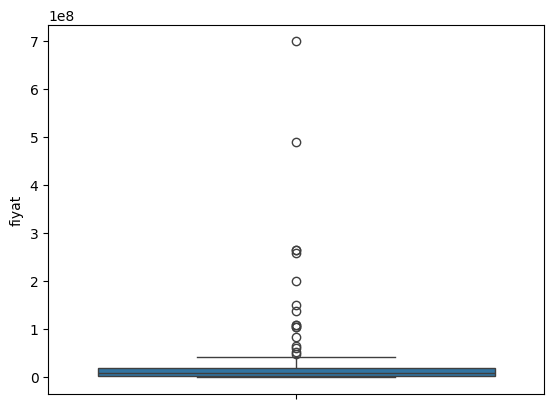

beylikduzu


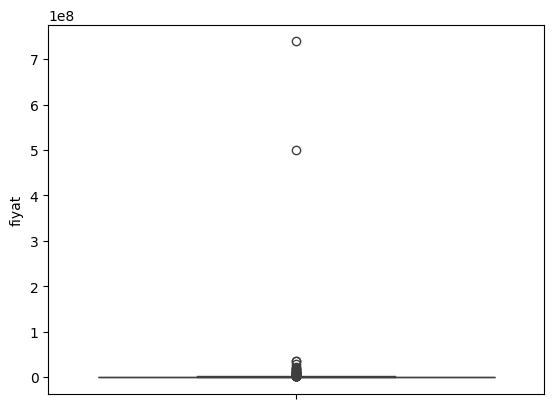

beyoglu


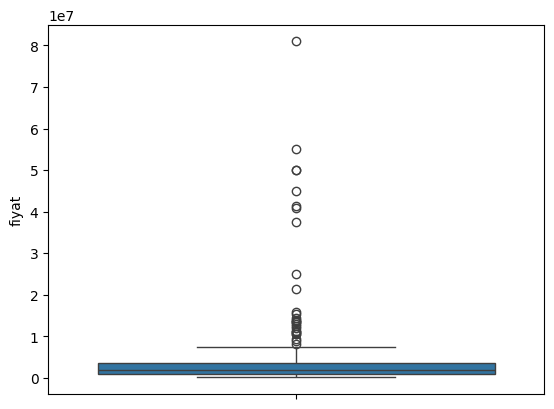

buyukcekmece


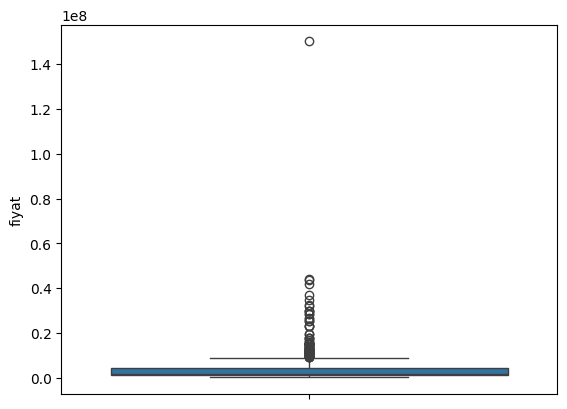

catalca


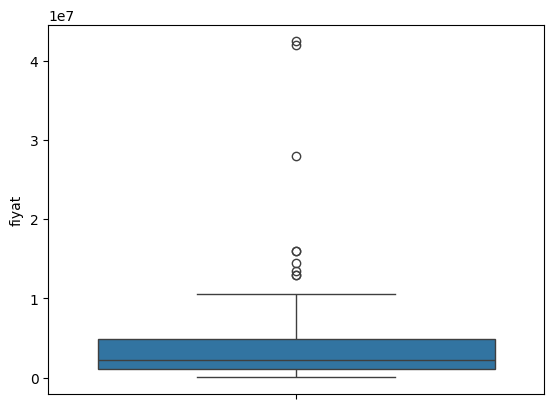

cekmekoy


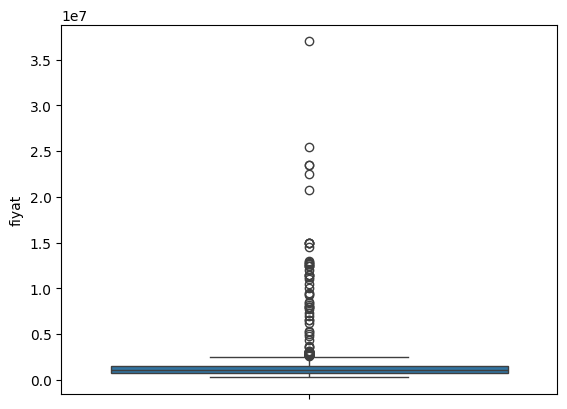

esenler


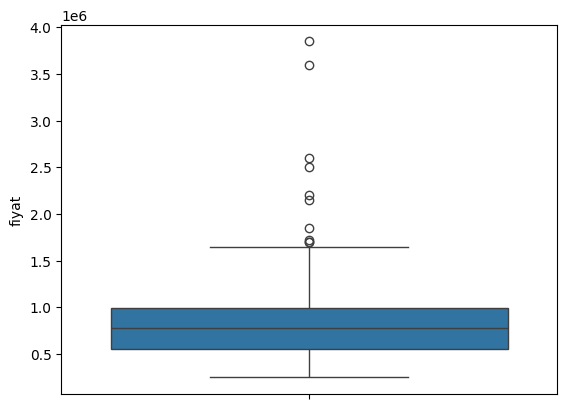

esenyurt


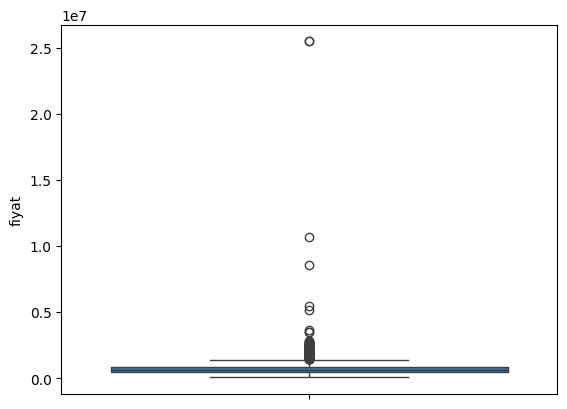

eyupsultan


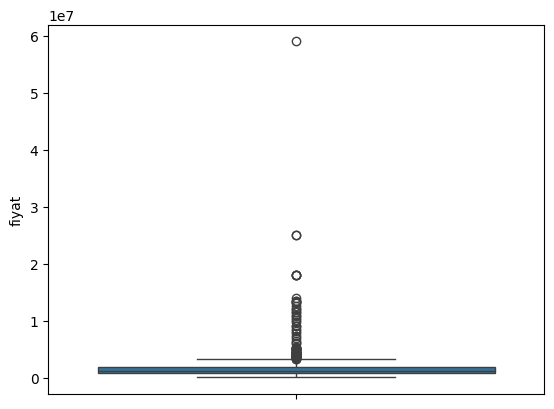

fatih


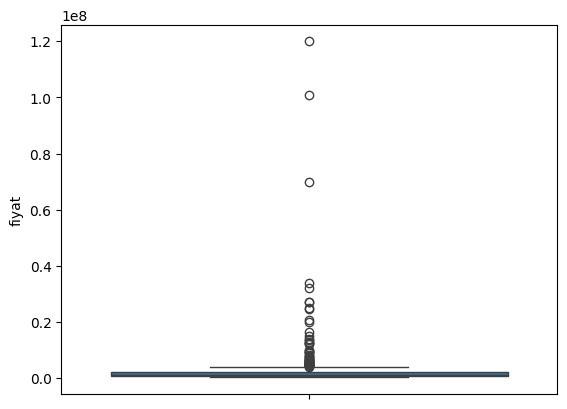

gaziosmanpasa


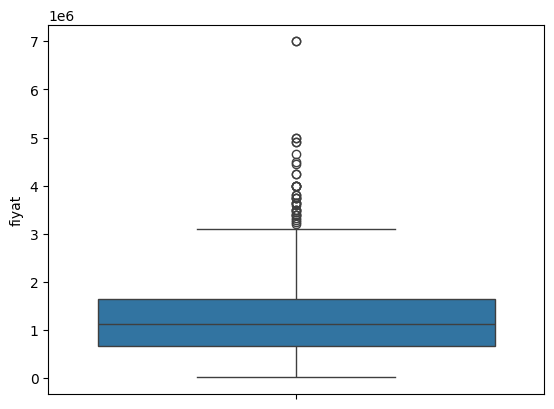

gungoren


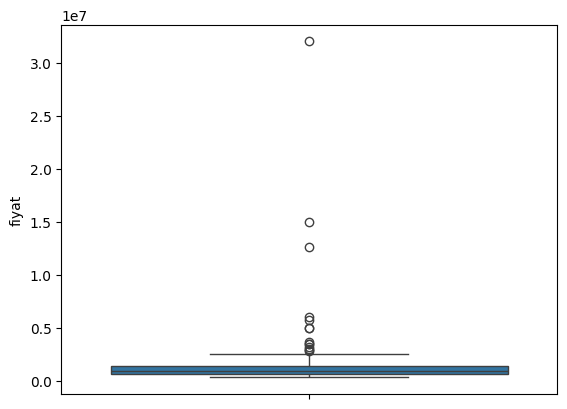

kadikoy


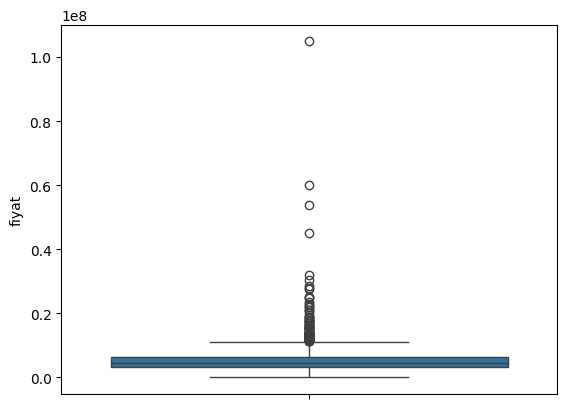

kagithane


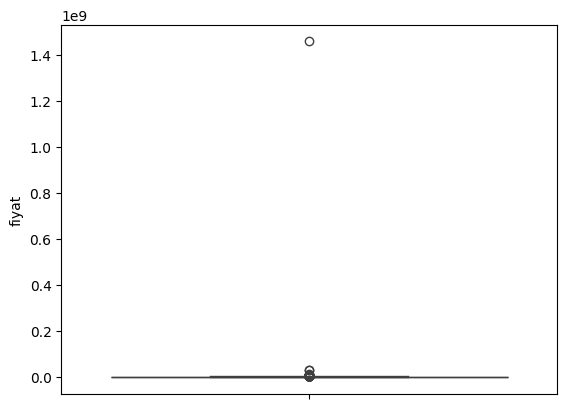

kartal


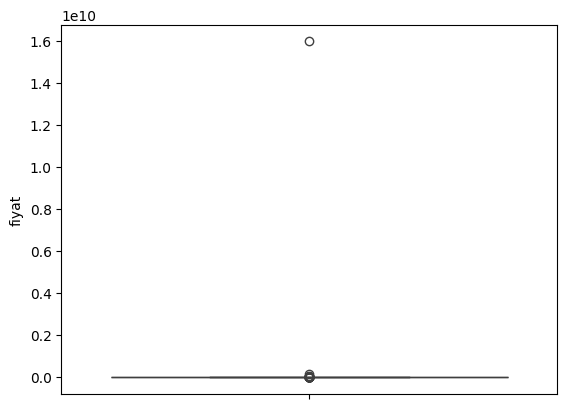

kucukcekmece


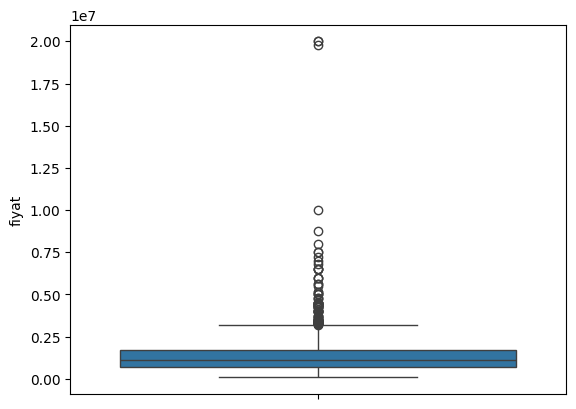

maltepe


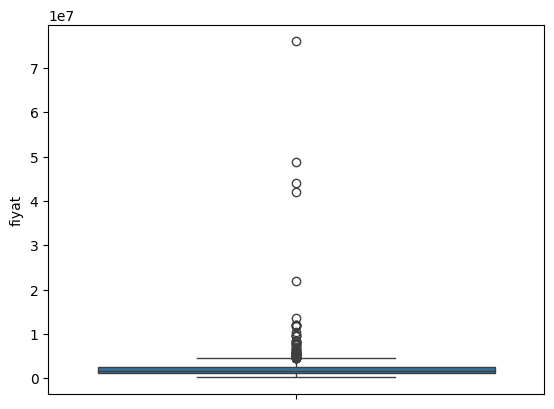

pendik


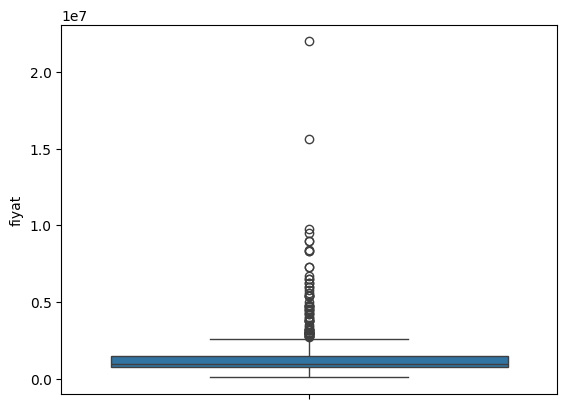

sancaktepe


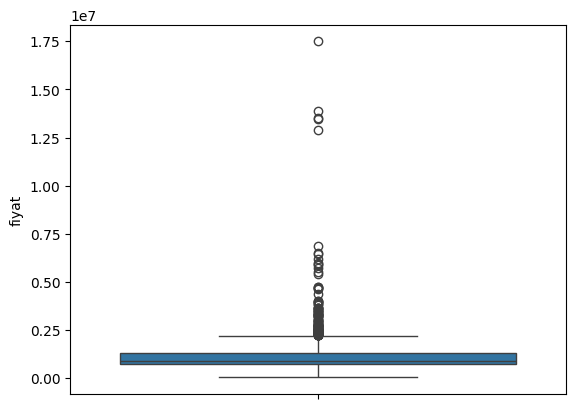

sariyer


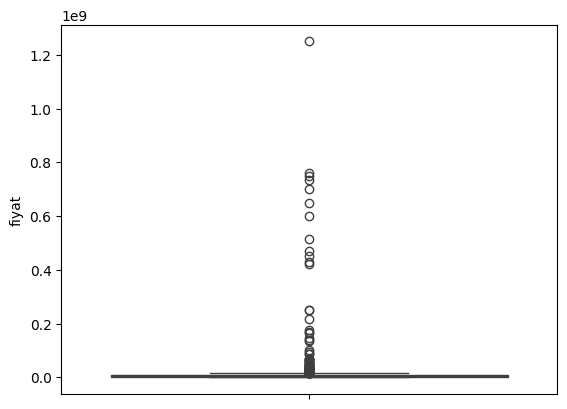

sile


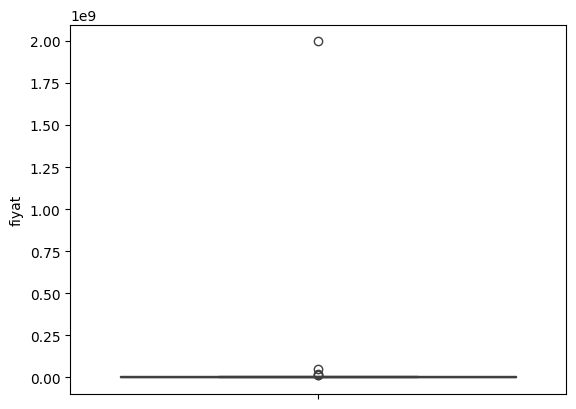

silivri


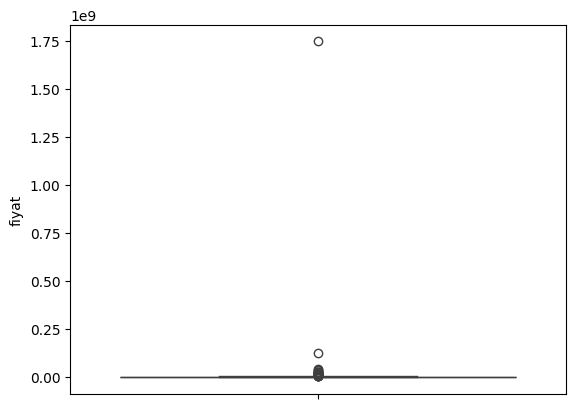

sisli


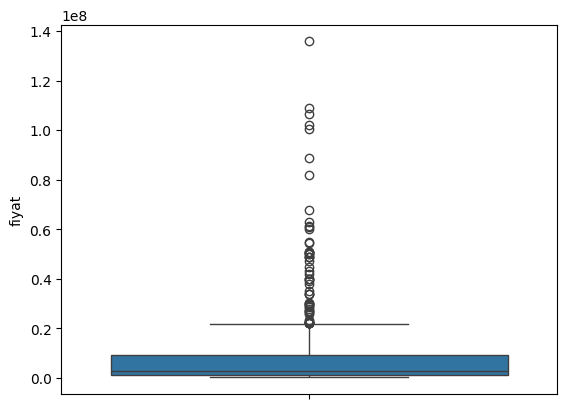

sultanbeyli


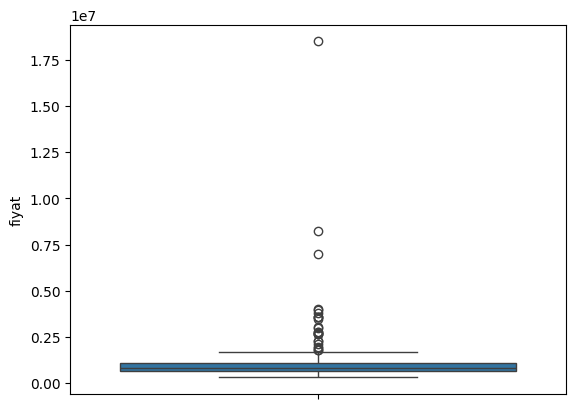

sultangazi


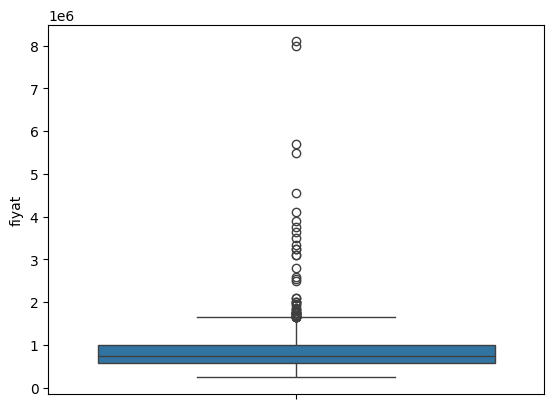

tuzla


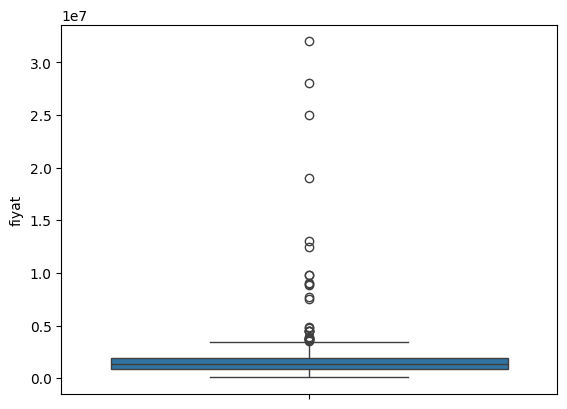

umraniye


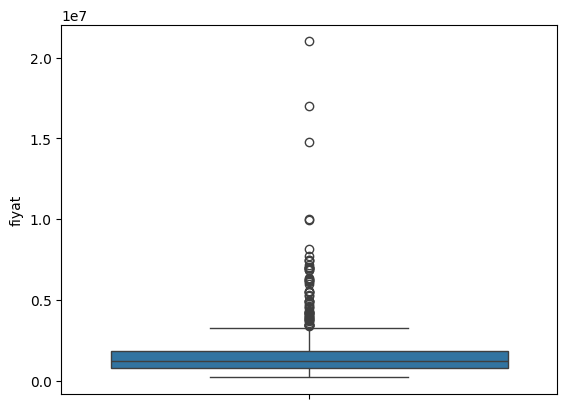

uskudar


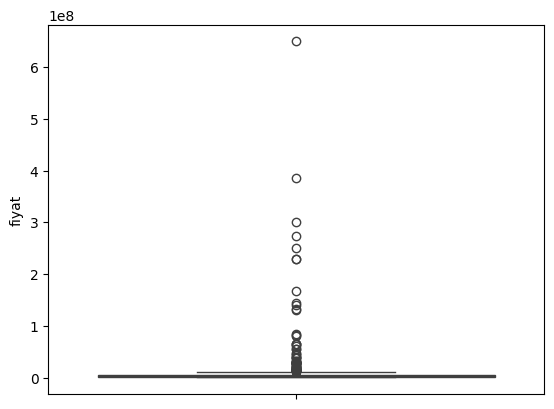

zeytinburnu


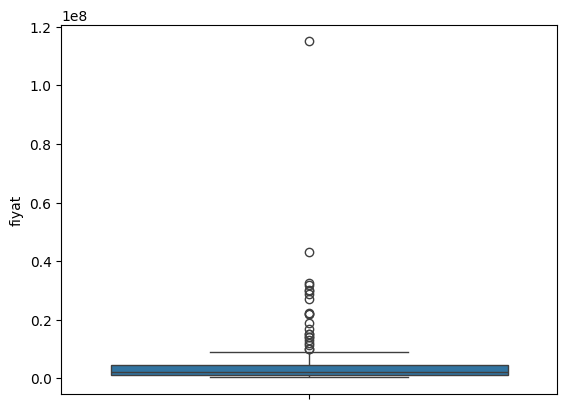

In [24]:
for i in veri["ilce"].unique():
    print(i)
    sns.boxplot(y="fiyat",data=veri[veri["ilce"]==i])
    plt.show()

In [25]:
veri.describe()

,brutm2,yas,kat_sayisi,netm2,fiyat
count,25155.000000,25155.000000,25155.000000,25155.000000,2.515500e+04
mean,148.958446,6.895766,7.757782,129.622293,4.987416e+06
std,101.089574,7.633388,6.952397,93.251425,1.057051e+08
min,1.000000,0.000000,1.000000,1.000000,2.000000e+04
25%,95.000000,0.000000,4.000000,80.000000,7.850000e+05
50%,120.000000,5.000000,5.000000,105.000000,1.350000e+06
75%,170.000000,11.000000,8.000000,145.000000,2.850000e+06
max,990.000000,21.000000,71.000000,999.000000,1.600000e+10


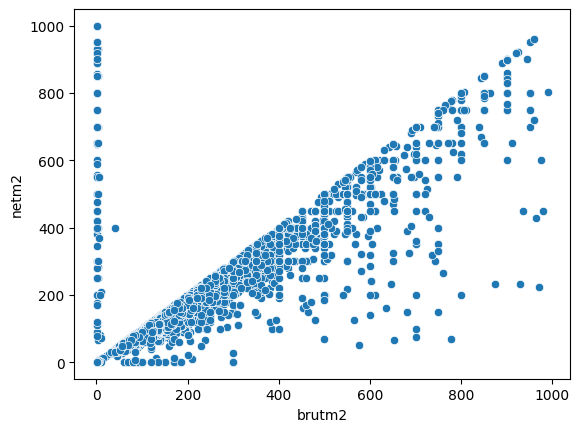

In [26]:
#brutm2 ve netm2 arasındaki ilişki
sns.scatterplot(x="brutm2",y="netm2",data=veri) #brutm2 ve netm2 arasında doğrusal bir ilişki var
plt.show()

In [27]:
sil=veri[(veri["netm2"]>veri["brutm2"])] 
veri.drop(sil.index,inplace=True)

In [28]:
sil2=veri[veri["netm2"]<50]
print(len(sil2))
veri.drop(sil2.index,inplace=True)

805


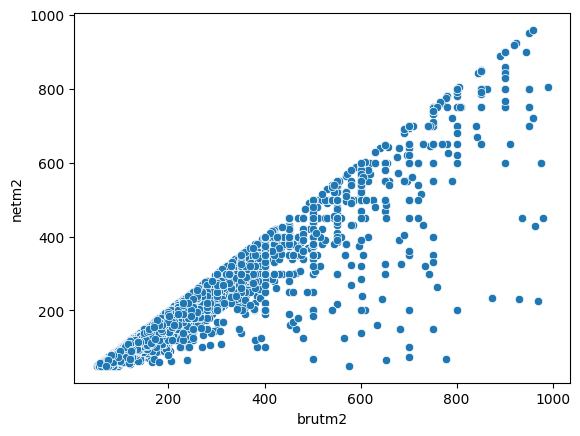

In [29]:
#brutm2 ve netm2 arasındaki ilişki
sns.scatterplot(x="brutm2",y="netm2",data=veri) #brutm2 ve netm2 arasında doğrusal bir ilişki var
plt.show()

In [ ]:
#brutm2 ve netm2 arasında 0.8 altında korealasyon olan verileri siliyoruz


# sil2=veri[(veri["netm2"]/veri["brutm2"]<0.3)]
# print(len(sil2))
# veri.drop(sil2.index,inplace=True)

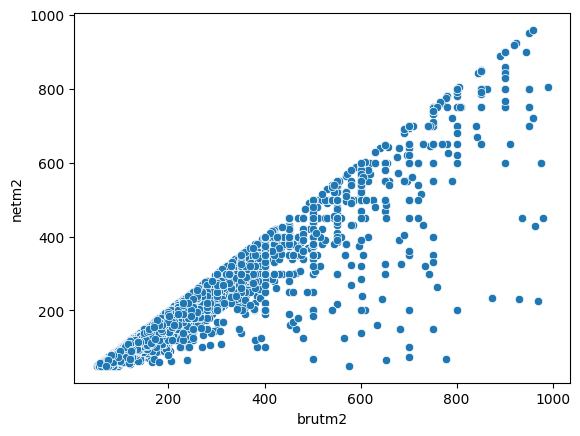

In [30]:
#brutm2 ve netm2 arasındaki ilişki
sns.scatterplot(x="brutm2",y="netm2",data=veri) #brutm2 ve netm2 arasında doğrusal bir ilişki var
plt.show()

<Axes: xlabel='ilce'>

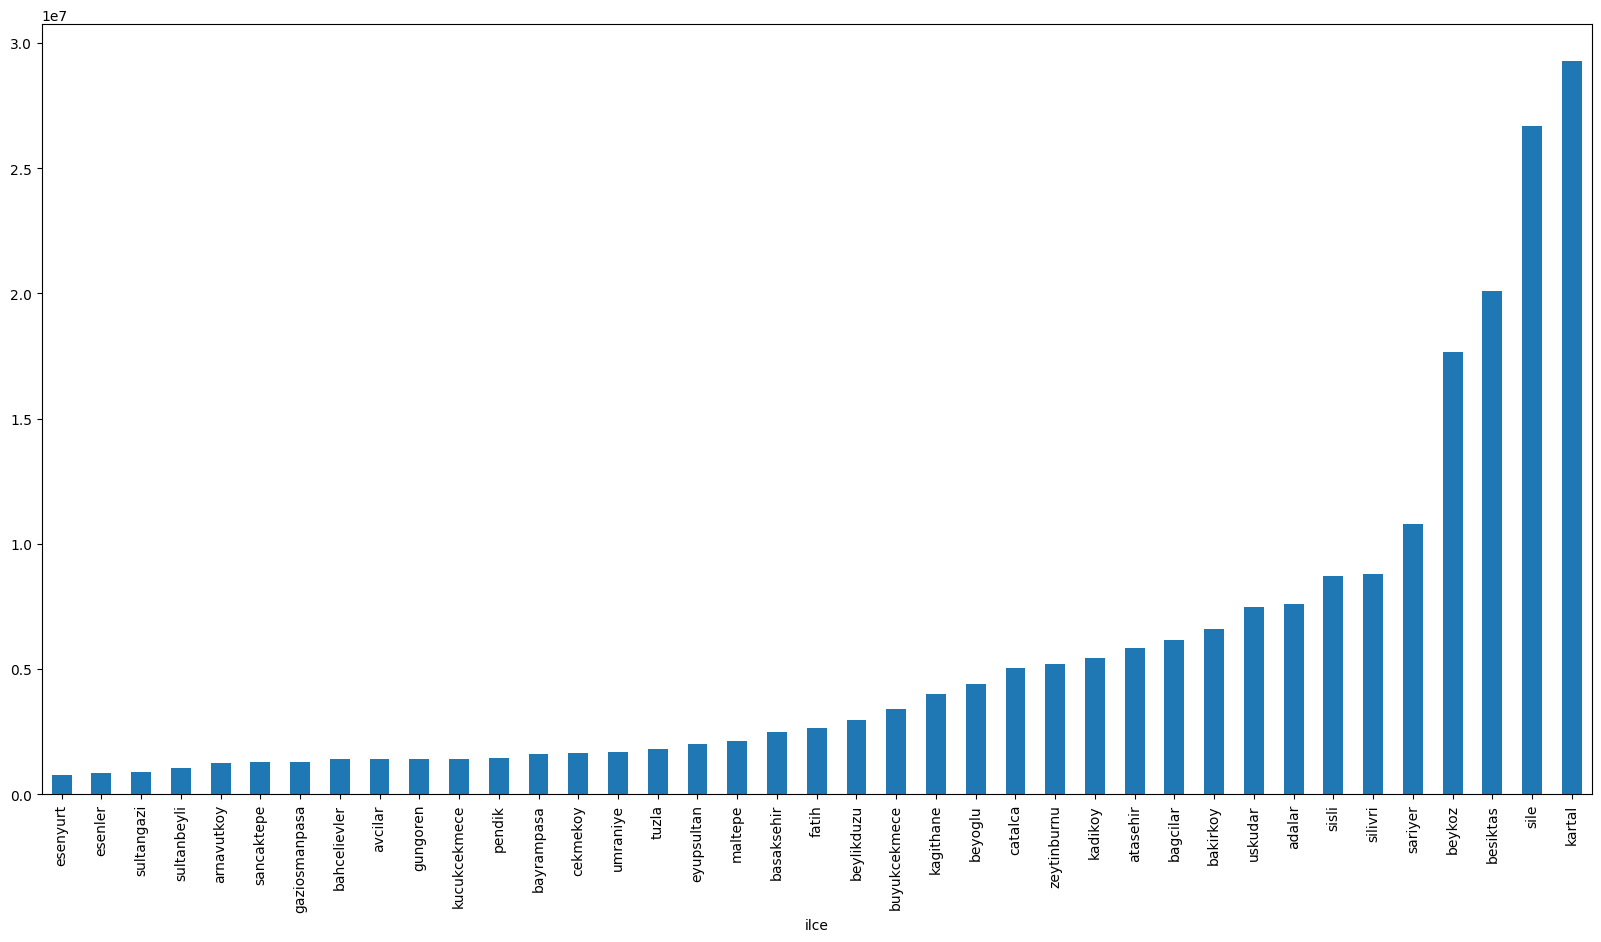

In [31]:
#ilce ve ilceçelerdeki ortlama fiyat arasındaki ilişki  
ilce_fiyat=veri.groupby("ilce")["fiyat"].mean().sort_values()

ilce_fiyat.plot(kind="bar",figsize=(20,10))



In [32]:
ilce_siralama=list(ilce_fiyat.index)
ilce_siralama

['esenyurt',
 'esenler',
 'sultangazi',
 'sultanbeyli',
 'arnavutkoy',
 'sancaktepe',
 'gaziosmanpasa',
 'bahcelievler',
 'avcilar',
 'gungoren',
 'kucukcekmece',
 'pendik',
 'bayrampasa',
 'cekmekoy',
 'umraniye',
 'tuzla',
 'eyupsultan',
 'maltepe',
 'basaksehir',
 'fatih',
 'beylikduzu',
 'buyukcekmece',
 'kagithane',
 'beyoglu',
 'catalca',
 'zeytinburnu',
 'kadikoy',
 'atasehir',
 'bagcilar',
 'bakirkoy',
 'uskudar',
 'adalar',
 'sisli',
 'silivri',
 'sariyer',
 'beykoz',
 'besiktas',
 'sile',
 'kartal']

In [ ]:
# ilce_siralama.index("sile")
# for i in enumerate(veri["ilce"]):
#     print(veri.iloc[i[0],0])
#     veri.iloc[i[0],0]=ilce_siralama.index(veri.iloc[i[0],0])
  
# veri["ilce"]=veri["ilce"].astype("int64")

In [33]:
veri["kat_sayisi"].unique()

array([ 3,  2,  4,  5,  1, 14,  6, 11,  7, 10, 12, 13, 15, 32,  9, 18,  8,
       23, 19, 30, 57, 17, 71, 40, 58, 50, 20, 29, 16, 24, 21, 26, 25, 27,
       31, 28, 33, 22, 38, 34, 36, 35, 39, 44, 52, 55, 42, 68, 45, 60, 65,
       48, 46, 54, 56])

In [34]:
veri["oda_sayisi"].unique()

array(['3+1', '2+1', '8+ Oda', '3+2', '5+1', '5 Oda', '2+2', '7+3', '1+1',
       '5+3', '1 Oda', '6+1', '4+2', '5+2', '4+1', '6+2', '6+3', '2.5+1',
       'Stüdyo', '6+4', '7+1', '1.5+1', '2+0', '7+2', '3.5+1', '4.5+1',
       '5+4'], dtype=object)

In [35]:
#kat labelencoder
from sklearn.preprocessing import LabelEncoder
le_kat = LabelEncoder()
le_ilce = LabelEncoder()
le_oda = LabelEncoder()
le_kredi = LabelEncoder()
le_tip = LabelEncoder()
# le_ilce.fit(ilce_siralama)
veri["kat"] = le_kat.fit_transform(veri["kat"])
veri["ilce"] = le_ilce.fit_transform(veri["ilce"])
veri["oda_sayisi"] = le_oda.fit_transform(veri["oda_sayisi"])
veri["kredi"] = le_kredi.fit_transform(veri["kredi"])
veri["tip"] = le_tip.fit_transform(veri["tip"])
veri.head()


,ilce,brutm2,yas,kat_sayisi,oda_sayisi,kat,kredi,netm2,tip,fiyat
0,0,160.0,21,3,7,54,1,120.0,1,3100000.0
1,0,120.0,5,3,4,42,1,100.0,1,1600000.0
2,0,350.0,21,2,7,43,1,300.0,7,18500000.0
3,0,550.0,11,3,25,43,2,540.0,0,9500000.0
4,0,840.0,21,4,25,43,1,700.0,6,25000000.0


In [36]:
print(le_oda.transform(["3+1"]))
print(le_oda.inverse_transform([7]))
print(le_oda.transform(["4+2"]))
print(le_oda.classes_)

[7]
['3+1']
[11]
['1 Oda' '1+1' '1.5+1' '2+0' '2+1' '2+2' '2.5+1' '3+1' '3+2' '3.5+1' '4+1'
 '4+2' '4.5+1' '5 Oda' '5+1' '5+2' '5+3' '5+4' '6+1' '6+2' '6+3' '6+4'
 '7+1' '7+2' '7+3' '8+ Oda' 'Stüdyo']


In [37]:
#train test bölütlemesi
from sklearn.model_selection import train_test_split
# veri.drop(columns=["brutm2","kat_sayisi","kat"],inplace=True)
X = veri.drop(columns=["fiyat"])
y = veri["fiyat"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)


In [38]:
#linear regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)


print("Linear Regression MSE: ",mean_squared_error(y_test, y_pred))
print("Linear Regression MSE: ",mean_absolute_error(y_test, y_pred))
print(lr.score(X_test,y_test))

Linear Regression MSE:  251336489780539.0
Linear Regression MSE:  3255323.039743832
0.12459555204775774


In [48]:
#nonlinear regression 
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
degree=3
model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
model.fit(X_train, y_train) 
y_pred = model.predict(X_test)
print("Nonlinear Regression MSE: ",mean_squared_error(y_test, y_pred))
print(model.score(X_test,y_test))

Nonlinear Regression MSE:  211322978024883.4
0.2639625265753158


In [49]:
test_num=100
# print(X_test.iloc[test_num])
print(y_test.iloc[test_num])
print(lr.predict([X_test.iloc[test_num]]),model.predict([X_test.iloc[test_num]])   )



830000.0
[2003660.89389718] [916040.86336138]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


In [ ]:
test_verileri=pd.DataFrame({"gercek":y_test,"tahmin":y_pred})

In [ ]:
#graph of linear regression
plt.figure(figsize=(10,6))
sns.scatterplot(data=test_verileri, x="gercek", y="tahmin")
plt.xlabel("Gerçek Değerler")
plt.ylabel("Tahmin Edilen Değerler")
plt.title("Gerçek ve Tahmin Edilen Değerler")
plt.show()